# Lab Assignment 10 - Submitted By : Vishav Gupta [102497018]

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).


1. Convert text to lowercase and remove punctuation using re.


In [4]:
import re

text = """Books are gateways to other worlds, providing readers with new perspectives and experiences. Whether it's a gripping mystery, an inspiring biography, or an imaginative fantasy, books have the power to transport us. They not only entertain but also educate and challenge our thinking. In a world of constant distractions, reading offers a quiet refuge and an opportunity to engage deeply with ideas. The joy of losing oneself in a good book is a timeless pleasure that transcends generations."""

text_lower = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_lower)

print(text_clean)

books are gateways to other worlds providing readers with new perspectives and experiences whether its a gripping mystery an inspiring biography or an imaginative fantasy books have the power to transport us they not only entertain but also educate and challenge our thinking in a world of constant distractions reading offers a quiet refuge and an opportunity to engage deeply with ideas the joy of losing oneself in a good book is a timeless pleasure that transcends generations


2. Tokenize the text into words and sentences.


In [5]:
import nltk
nltk.download('punkt_tab')

word_tokens = nltk.word_tokenize(text_clean)
sentence_tokens = nltk.sent_tokenize(text_clean)

print("Word Tokens:", word_tokens[:10])
print("Sentence Tokens:", sentence_tokens[:3])

Word Tokens: ['books', 'are', 'gateways', 'to', 'other', 'worlds', 'providing', 'readers', 'with', 'new']
Sentence Tokens: ['books are gateways to other worlds providing readers with new perspectives and experiences whether its a gripping mystery an inspiring biography or an imaginative fantasy books have the power to transport us they not only entertain but also educate and challenge our thinking in a world of constant distractions reading offers a quiet refuge and an opportunity to engage deeply with ideas the joy of losing oneself in a good book is a timeless pleasure that transcends generations']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.


In [6]:
split_text = text_clean.split()

word_tokens_nltk = nltk.word_tokenize(text_clean)

print("Tokens using split():", split_text[:10])
print("Tokens using word_tokenize():", word_tokens_nltk[:10])

Tokens using split(): ['books', 'are', 'gateways', 'to', 'other', 'worlds', 'providing', 'readers', 'with', 'new']
Tokens using word_tokenize(): ['books', 'are', 'gateways', 'to', 'other', 'worlds', 'providing', 'readers', 'with', 'new']


4. Remove stopwords (using NLTK's stopwords list).


In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in word_tokens_nltk if word.lower() not in stop_words]

print("Filtered Words:", filtered_words[:10])

Filtered Words: ['books', 'gateways', 'worlds', 'providing', 'readers', 'new', 'perspectives', 'experiences', 'whether', 'gripping']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5. Display word frequency distribution (excluding stopwords).

In [8]:
from nltk import FreqDist

fdist = FreqDist(filtered_words)

print(fdist.most_common(10))

[('books', 2), ('gateways', 1), ('worlds', 1), ('providing', 1), ('readers', 1), ('new', 1), ('perspectives', 1), ('experiences', 1), ('whether', 1), ('gripping', 1)]


**Q2. Using the same paragraph from Q1:**

1. Extract all words with only alphabets using re.findall()


In [9]:
import re

words_only_alpha = re.findall(r'\b[a-zA-Z]+\b', text.lower())

print("Words with only alphabets:", words_only_alpha[:10])

Words with only alphabets: ['books', 'are', 'gateways', 'to', 'other', 'worlds', 'providing', 'readers', 'with', 'new']


2. Remove stop words using NLTK’s stopword list


In [10]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_alpha_words = [word for word in words_only_alpha if word not in stop_words]

print("Filtered words without stopwords:", filtered_alpha_words[:10])

Filtered words without stopwords: ['books', 'gateways', 'worlds', 'providing', 'readers', 'new', 'perspectives', 'experiences', 'whether', 'gripping']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3. Perform stemming with PorterStemmer


In [11]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in filtered_alpha_words]

print("Stemmed words:", stemmed_words[:10])

Stemmed words: ['book', 'gateway', 'world', 'provid', 'reader', 'new', 'perspect', 'experi', 'whether', 'grip']


4. Perform lemmatization with WordNetLemmaƟzer


In [12]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]

print("Lemmatized words:", lemmatized_words[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized words: ['book', 'gateway', 'world', 'providing', 'reader', 'new', 'perspective', 'experience', 'whether', 'gripping']


5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over
the other.

In [13]:
for stem, lemma in zip(stemmed_words[:10], lemmatized_words[:10]):
    print(f"Stemmed: {stem}, Lemmatized: {lemma}")

Stemmed: book, Lemmatized: book
Stemmed: gateway, Lemmatized: gateway
Stemmed: world, Lemmatized: world
Stemmed: provid, Lemmatized: providing
Stemmed: reader, Lemmatized: reader
Stemmed: new, Lemmatized: new
Stemmed: perspect, Lemmatized: perspective
Stemmed: experi, Lemmatized: experience
Stemmed: whether, Lemmatized: whether
Stemmed: grip, Lemmatized: gripping


**Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).**


In [14]:
texts = [
    "The economy is showing signs of recovery after the pandemic.",
    "The new smartphone features an upgraded camera and a faster processor.",
    "The football team celebrated their victory with a huge parade."
]

1. Use CountVectorizer to generate the Bag of Words representation.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(texts)

words = count_vectorizer.get_feature_names_out()

bag_of_words_array = bag_of_words.toarray()

print("Bag of Words Representation (CountVectorizer):")
print(bag_of_words_array)
print("Words (features):", words)

Bag of Words Representation (CountVectorizer):
[[1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 2 0 0 0 0]
 [0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1]]
Words (features): ['after' 'an' 'and' 'camera' 'celebrated' 'economy' 'faster' 'features'
 'football' 'huge' 'is' 'new' 'of' 'pandemic' 'parade' 'processor'
 'recovery' 'showing' 'signs' 'smartphone' 'team' 'the' 'their' 'upgraded'
 'victory' 'with']


2. Use TfidfVectorizer to compute TF-IDF scores.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

tfidf_words = tfidf_vectorizer.get_feature_names_out()

tfidf_array = tfidf_matrix.toarray()

print("\nTF-IDF Scores (TfidfVectorizer):")
print(tfidf_array)
print("Words (features):", tfidf_words)


TF-IDF Scores (TfidfVectorizer):
[[0.32624544 0.         0.         0.         0.         0.32624544
  0.         0.         0.         0.         0.32624544 0.
  0.32624544 0.32624544 0.         0.         0.32624544 0.32624544
  0.32624544 0.         0.         0.38537163 0.         0.
  0.         0.        ]
 [0.         0.32705548 0.32705548 0.32705548 0.         0.
  0.32705548 0.32705548 0.         0.         0.         0.32705548
  0.         0.         0.         0.32705548 0.         0.
  0.         0.32705548 0.         0.19316423 0.         0.32705548
  0.         0.        ]
 [0.         0.         0.         0.         0.34608857 0.
  0.         0.         0.34608857 0.34608857 0.         0.
  0.         0.         0.34608857 0.         0.         0.
  0.         0.         0.34608857 0.20440549 0.34608857 0.
  0.34608857 0.34608857]]
Words (features): ['after' 'an' 'and' 'camera' 'celebrated' 'economy' 'faster' 'features'
 'football' 'huge' 'is' 'new' 'of' 'pandemic' 'p

3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [17]:
import numpy as np

print("\nTop 3 Keywords Using TF-IDF:")

for i, text in enumerate(texts):
    tfidf_scores = tfidf_array[i]

    top_3_indices = np.argsort(tfidf_scores)[::-1][:3]

    top_3_keywords = [tfidf_words[index] for index in top_3_indices]

    print(f"Text {i+1}: '{text}'")
    print("Top 3 Keywords:", top_3_keywords)
    print()


Top 3 Keywords Using TF-IDF:
Text 1: 'The economy is showing signs of recovery after the pandemic.'
Top 3 Keywords: ['the', 'recovery', 'showing']

Text 2: 'The new smartphone features an upgraded camera and a faster processor.'
Top 3 Keywords: ['smartphone', 'upgraded', 'an']

Text 3: 'The football team celebrated their victory with a huge parade.'
Top 3 Keywords: ['with', 'victory', 'their']



**Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).**

In [18]:
text1 = """Artificial Intelligence (AI) involves the simulation of human intelligence in machines that are programmed to think and learn. AI is transforming industries such as healthcare, finance, and transportation, enabling automation and data analysis on a massive scale. Machine learning, a subset of AI, allows computers to improve from experience without being explicitly programmed."""

text2 = """Blockchain is a decentralized digital ledger technology that records transactions across multiple computers. It ensures transparency, security, and immutability of data. Blockchain is most commonly associated with cryptocurrencies like Bitcoin, but its applications are expanding to sectors like supply chain, finance, and healthcare."""

1. Preprocess and tokenize both texts.


In [19]:
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def preprocess_and_tokenize(text):
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text_clean)
    return tokens

tokens_text1 = preprocess_and_tokenize(text1)
tokens_text2 = preprocess_and_tokenize(text2)

print("Tokens for Text 1:", tokens_text1)
print("Tokens for Text 2:", tokens_text2)

Tokens for Text 1: ['artificial', 'intelligence', 'ai', 'involves', 'the', 'simulation', 'of', 'human', 'intelligence', 'in', 'machines', 'that', 'are', 'programmed', 'to', 'think', 'and', 'learn', 'ai', 'is', 'transforming', 'industries', 'such', 'as', 'healthcare', 'finance', 'and', 'transportation', 'enabling', 'automation', 'and', 'data', 'analysis', 'on', 'a', 'massive', 'scale', 'machine', 'learning', 'a', 'subset', 'of', 'ai', 'allows', 'computers', 'to', 'improve', 'from', 'experience', 'without', 'being', 'explicitly', 'programmed']
Tokens for Text 2: ['blockchain', 'is', 'a', 'decentralized', 'digital', 'ledger', 'technology', 'that', 'records', 'transactions', 'across', 'multiple', 'computers', 'it', 'ensures', 'transparency', 'security', 'and', 'immutability', 'of', 'data', 'blockchain', 'is', 'most', 'commonly', 'associated', 'with', 'cryptocurrencies', 'like', 'bitcoin', 'but', 'its', 'applications', 'are', 'expanding', 'to', 'sectors', 'like', 'supply', 'chain', 'finance

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


2. Calculate:
- Jaccard Similarity using sets
- Cosine Similarity using TfidfVectorizer + cosine_similarity()
- Analyze which similarity metric gives better insights in your case.

In [20]:
# a. Jaccard Similarity using sets
set_text1 = set(tokens_text1)
set_text2 = set(tokens_text2)

intersection = len(set_text1.intersection(set_text2))
union = len(set_text1.union(set_text2))
jaccard_similarity = intersection / union

print(f"Jaccard Similarity: {jaccard_similarity}")

Jaccard Similarity: 0.1527777777777778


In [21]:
# b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])

cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

print(f"Cosine Similarity: {cosine_sim[0][0]}")

Cosine Similarity: 0.18260597124588573


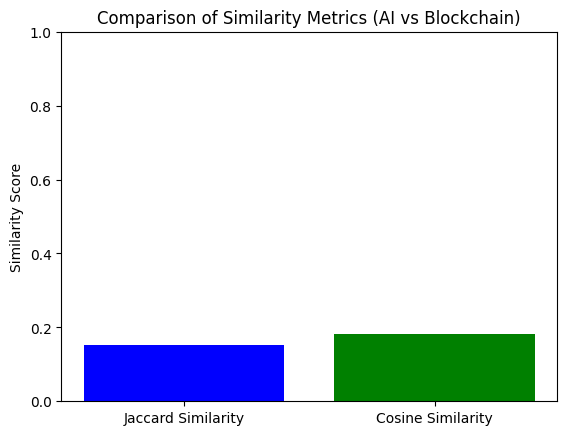

Jaccard Similarity: 0.1527777777777778
Cosine Similarity: 0.18260597124588573


In [25]:
# c. Analyze which similarity metric gives beƩer insights in your case.
import matplotlib.pyplot as plt

similarity_scores = [jaccard_similarity, cosine_sim[0][0]]
labels = ['Jaccard Similarity', 'Cosine Similarity']

plt.bar(labels, similarity_scores, color=['blue', 'green'])
plt.title("Comparison of Similarity Metrics (AI vs Blockchain)")
plt.ylabel("Similarity Score")
plt.ylim(0, 1)
plt.show()

print(f"Jaccard Similarity: {jaccard_similarity}")
print(f"Cosine Similarity: {cosine_sim[0][0]}")

**Q5. Write a short review for a product or service.**

In [26]:
review1 = """I recently bought a new smartphone, and it's amazing! The camera quality is exceptional, and the battery life lasts for more than a day with heavy use. The design is sleek and modern, and the overall performance is smooth. I highly recommend this phone to anyone looking for a reliable device."""
review2 = """The service at this restaurant was terrible. The food took over an hour to arrive, and when it did, it was cold. The staff seemed uninterested in helping, and the atmosphere was uncomfortable. I won’t be coming back anytime soon."""
review3 = """I’ve tried this skincare cream for a week, and I feel it has a positive effect on my skin. It’s very moisturizing and gentle. The fragrance is subtle, and my skin feels much smoother. Overall, I’m satisfied with the product."""
reviews = [review1, review2, review3]

1. Use TextBlob or VADER to find polarity & subjectivity for each review.


In [27]:
from textblob import TextBlob

def analyze_sentiment_textblob(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

for review in reviews:
    polarity, subjectivity = analyze_sentiment_textblob(review)
    print(f"Review: {review[:50]}... -> Polarity: {polarity}, Subjectivity: {subjectivity}")

Review: I recently bought a new smartphone, and it's amazi... -> Polarity: 0.2613030303030303, Subjectivity: 0.4944545454545454
Review: The service at this restaurant was terrible. The f... -> Polarity: -0.525, Subjectivity: 0.75
Review: I’ve tried this skincare cream for a week, and I f... -> Polarity: 0.14199134199134197, Subjectivity: 0.47792207792207797


2. Classify reviews into Positive / Negative / Neutral.


In [31]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment_vader(review):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']

for review in reviews:
    compound_score = analyze_sentiment_vader(review)
    print(f"Review: {review[:50]}... -> Compound Score: {compound_score}")

Review: I recently bought a new smartphone, and it's amazi... -> Compound Score: 0.7836
Review: The service at this restaurant was terrible. The f... -> Compound Score: -0.5423
Review: I’ve tried this skincare cream for a week, and I f... -> Compound Score: 0.8612


3. Create a word cloud using the wordcloud library for all positive reviews.

In [30]:
def classify_review_textblob(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

classified_reviews_textblob = []
for review in reviews:
    polarity, subjectivity = analyze_sentiment_textblob(review)
    sentiment_textblob = classify_review_textblob(polarity)
    classified_reviews_textblob.append((review, sentiment_textblob))

for review, sentiment in classified_reviews_textblob:
    print(f"Review: {review[:50]}... -> Sentiment: {sentiment}")

Review: I recently bought a new smartphone, and it's amazi... -> Sentiment: Positive
Review: The service at this restaurant was terrible. The f... -> Sentiment: Negative
Review: I’ve tried this skincare cream for a week, and I f... -> Sentiment: Positive


**Q6. Choose your own paragraph (~100 words) as training data.**

In [33]:
text = """
Artificial intelligence is transforming industries by automating tasks, optimizing processes, and enabling data-driven decision-making.
Machine learning, a subset of AI, allows systems to improve from experience without being explicitly programmed.
Deep learning, which uses neural networks with many layers, has shown great success in fields such as computer vision and natural language processing.
AI has the potential to revolutionize healthcare, transportation, finance, and more, but it also raises concerns about job displacement and ethical implications.
As AI continues to evolve, its impact on society will be profound, and its responsible development will be crucial for the future.
"""

1. Tokenize text using Tokenizer() from keras.preprocessing.text


In [41]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

sequences = tokenizer.texts_to_sequences([text])[0]

print("Sequences:", sequences)

Sequences: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 21, 22, 23, 24, 25, 26, 4, 27, 28, 29, 2, 30, 31, 3, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 5, 47, 48, 49, 50, 51, 52, 6, 53, 54, 1, 55, 56, 57, 2, 5, 7, 58, 3, 59, 60, 61, 62, 1, 63, 64, 65, 66, 67, 68, 69, 70, 71, 1, 72, 73, 6, 2, 74, 3, 75, 8, 76, 77, 78, 9, 10, 79, 1, 8, 80, 81, 9, 10, 82, 83, 7, 84]


2. Create input sequences and build a simple LSTM or Dense model


In [42]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

sequence_length = 5
X = []
y = []

for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])
    y.append(sequences[i])

X = np.array(X)
y = np.array(y)

X = pad_sequences(X, padding='pre')

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10, input_length=sequence_length))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [47]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

def generate_text(seed_text, max_length=50):
    input_ids = tokenizer.encode(seed_text, return_tensors='pt')

    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, temperature=0.7, top_p=0.9, top_k=50)

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

seed_word = "Artificial intelligence"
generated_text = generate_text(seed_word, max_length=100)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [48]:
print("\nGenerated Text:", generated_text)


Generated Text: Artificial intelligence is a new field of research that has been in the works for a while now. It is now possible to create artificial intelligence that can perform tasks that are difficult to perform in real life.

The research was published in Nature Communications. The researchers used a computer program called DeepMind to analyze the neural networks of a group of people who were asked to complete tasks in a virtual reality environment. They then used the program to learn how to use the computer to solve the tasks. This
